In [1]:
# IMPORTS

from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
from IPython.display import Audio, display
import soundfile as sf
import io
import base64
from collections import Counter
import pandas as pd

In [2]:
# Load FLEURS dataset for English (en_us) and Hindi (hi_in)

en_dataset = load_dataset("google/fleurs", "en_us", split="train")
hi_dataset = load_dataset("google/fleurs", "hi_in", split="train")

README.md:   0%|          | 0.00/13.3k [00:00<?, ?B/s]

fleurs.py:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

The repository for google/fleurs contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/google/fleurs.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N]  y


train.tar.gz:   0%|          | 0.00/1.38G [00:00<?, ?B/s]

dev.tar.gz:   0%|          | 0.00/171M [00:00<?, ?B/s]

test.tar.gz:   0%|          | 0.00/290M [00:00<?, ?B/s]

train.tsv:   0%|          | 0.00/1.41M [00:00<?, ?B/s]

dev.tsv:   0%|          | 0.00/213k [00:00<?, ?B/s]

test.tsv:   0%|          | 0.00/368k [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

train.tar.gz:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

dev.tar.gz:   0%|          | 0.00/132M [00:00<?, ?B/s]

test.tar.gz:   0%|          | 0.00/249M [00:00<?, ?B/s]

train.tsv:   0%|          | 0.00/2.35M [00:00<?, ?B/s]

dev.tsv:   0%|          | 0.00/250k [00:00<?, ?B/s]

test.tsv:   0%|          | 0.00/473k [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [3]:
# Inspect contents of dataset

print(en_dataset)
print('\n')
print(hi_dataset)
print('\n')

Dataset({
    features: ['id', 'num_samples', 'path', 'audio', 'transcription', 'raw_transcription', 'gender', 'lang_id', 'language', 'lang_group_id'],
    num_rows: 2602
})


Dataset({
    features: ['id', 'num_samples', 'path', 'audio', 'transcription', 'raw_transcription', 'gender', 'lang_id', 'language', 'lang_group_id'],
    num_rows: 2120
})




In [15]:
# Custom function for cleaning wrong/missing punctuation in Hindi dataset
def clean_hi_text(hi_text):
  if hi_text[-1] in set(['।', '’', '”', '?', '!']):
    return hi_text
  elif hi_text[-1] == '.':
    return hi_text[:-1] + '।'
  else:
    return hi_text + '।'
      

## Pair the Eng and Hindi data that we need - text and audio in both

paired_data = []
hi_lookup = {item['id']: {"raw_transcription": clean_hi_text(item['raw_transcription']), "audio": item['audio']} for item in hi_dataset}

for en_item in en_dataset:
    hi_item = hi_lookup.get(en_item['id'])
    if hi_item:
        paired_data.append({
            "en_text": en_item['raw_transcription'],
            "en_speech": en_item['audio'],
            "hi_text": hi_item['raw_transcription'],
            "hi_speech": hi_item['audio']
        })

# print number of train samples
print(f"Number of samples: {len(paired_data)}\n")
print("Sample", paired_data[0])

Number of samples: 2254

Sample {'en_text': 'A tornado is a spinning column of very low-pressure air, which sucks the surrounding air inward and upward.', 'en_speech': {'path': 'train/10004088536354799741.wav', 'array': array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
       -3.15904617e-06, -3.03983688e-06, -3.27825546e-06]), 'sampling_rate': 16000}, 'hi_text': 'बवंडर बहुत कम दबाव वाली हवा का एक घुमता हुवा स्तंभ होता है, जो आसपास की हवा को अंदर और ऊपर की तरफ खींचता है।', 'hi_speech': {'path': 'train/2167296092781274746.wav', 'array': array([ 0.        ,  0.        ,  0.        , ...,  0.00045049,
       -0.00089818, -0.00016266]), 'sampling_rate': 16000}}


In [16]:
# Print some samples
for i in range(5):
    item = paired_data[i]
    print(item['en_text'])
    print(item['hi_text'])
    print('\n\n')

A tornado is a spinning column of very low-pressure air, which sucks the surrounding air inward and upward.
बवंडर बहुत कम दबाव वाली हवा का एक घुमता हुवा स्तंभ होता है, जो आसपास की हवा को अंदर और ऊपर की तरफ खींचता है।



Former U.S. Speaker of the House Newt Gingrich came in second with 32 percent.
न्यूट गिंगरिच सदन के पूर्व अमेरिकी वक्ता 32 प्रतिशत के साथ दूसरे स्थान पर आए।



The island was first inhabited by the Taínos and Caribes. The Caribes were an Arawakan-speaking people who had arrived around 10,000 BCE.
इस आइलैंड पर पहले टाइनोस और कैरिबीज़ लोग रहते थे. कैरिबीज़ लोग अरवाकन भाषा बोलते थे और वे 10,000 ईसा पूर्व आए थे।



On September 24, 1759, Arthur Guinness signed a 9,000 year lease for the St James' Gate Brewery in Dublin, Ireland.
24 सितंबर, 1759 को, आर्थर गिनीज़ ने डबलिन, आयरलैंड में सेंट जेम्स गेट ब्रूअरी के लिए 9,000 साल की लीज़ पर हस्ताक्षर किए।



With the same time zone as Hawaii, the islands are sometimes thought of as "Hawaii down under".
हवाई के टाइम ज़ोन के समान, द्

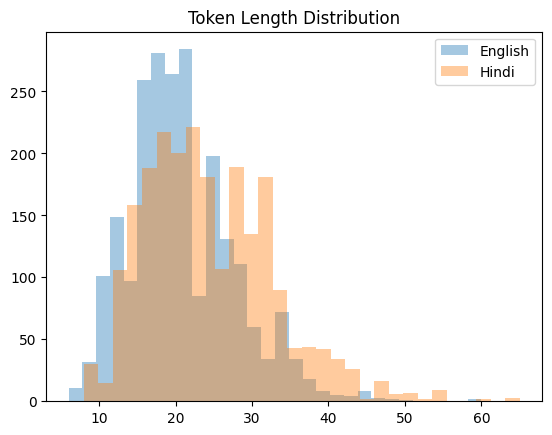

In [17]:
eng_lens = [len(d['en_text'].split()) for d in paired_data]
hi_lens = [len(d['hi_text'].split()) for d in paired_data]

plt.hist(eng_lens, bins=30, alpha=0.4, label='English')
plt.hist(hi_lens, bins=30, alpha=0.4, label='Hindi')
plt.legend()
plt.title("Token Length Distribution")
plt.show()

In [18]:
# Define common punctuations
eng_punct_chars = set(['.', ',', '?', '!', ':', ';', '‘', '’', '“', '”', '-'])
hi_punct_chars = set(['।', '.', ',', '?', '!', ':', ';', '‘', '’', '“', '”', '-'])

eng_texts = [d['en_text'] for d in paired_data]
hi_texts = [d['hi_text'] for d in paired_data]

eng_counter = Counter()
hi_counter = Counter()

for text in eng_texts:
    for ch in text:
        if ch in eng_punct_chars:
            eng_counter[ch] += 1

for text in hi_texts:
    for ch in text:
        if ch in hi_punct_chars:
            hi_counter[ch] += 1

print("Eng: ", eng_counter)
print("Hindi: ", hi_counter)

Eng:  Counter({'.': 2583, ',': 2397, '-': 350, ':': 64, ';': 34, '’': 26, '?': 17, '!': 12, '”': 11, '“': 7, '‘': 3})
Hindi:  Counter({'।': 2317, ',': 2014, '-': 414, '.': 310, '“': 172, '”': 162, ':': 61, ';': 28, '?': 19, '!': 7, '’': 2})


In [19]:
def comprehensive_audio_analysis(audio_array, sample_rate, title="Audio Analysis"):
    """
    Comprehensive audio analysis with multiple plots
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Waveform
    time = np.linspace(0, len(audio_array) / sample_rate, len(audio_array))
    axes[0, 0].plot(time, audio_array, color='blue', alpha=0.7)
    axes[0, 0].set_title("Waveform")
    axes[0, 0].set_xlabel("Time (s)")
    axes[0, 0].set_ylabel("Amplitude")
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio_array)), ref=np.max)
    im1 = librosa.display.specshow(D, y_axis='hz', x_axis='time', sr=sample_rate, ax=axes[0, 1])
    axes[0, 1].set_title("Spectrogram")
    plt.colorbar(im1, ax=axes[0, 1], format='%+2.0f dB')
    
    # 3. Mel Spectrogram
    mel_spec = librosa.feature.melspectrogram(y=audio_array, sr=sample_rate)
    mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
    im2 = librosa.display.specshow(mel_spec_db, y_axis='mel', x_axis='time', sr=sample_rate, ax=axes[1, 0])
    axes[1, 0].set_title("Mel Spectrogram")
    plt.colorbar(im2, ax=axes[1, 0], format='%+2.0f dB')
    
    # 4. MFCC
    mfccs = librosa.feature.mfcc(y=audio_array, sr=sample_rate)
    im3 = librosa.display.specshow(mfccs, x_axis='time', ax=axes[1, 1])
    axes[1, 1].set_title("MFCC")
    plt.colorbar(im3, ax=axes[1, 1])
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Audio stats
    duration = len(audio_array) / sample_rate
    print(f"   Audio Statistics:")
    print(f"   Duration: {duration:.2f} seconds")
    print(f"   Sample Rate: {sample_rate} Hz")
    print(f"   Samples: {len(audio_array):,}")
    print(f"   Max Amplitude: {np.max(np.abs(audio_array)):.4f}")
    print(f"   RMS Energy: {np.sqrt(np.mean(audio_array**2)):.4f}")
    
    # Audio player
    return Audio(audio_array, rate=sample_rate)

English Transcript: A tornado is a spinning column of very low-pressure air, which sucks the surrounding air inward and upward.



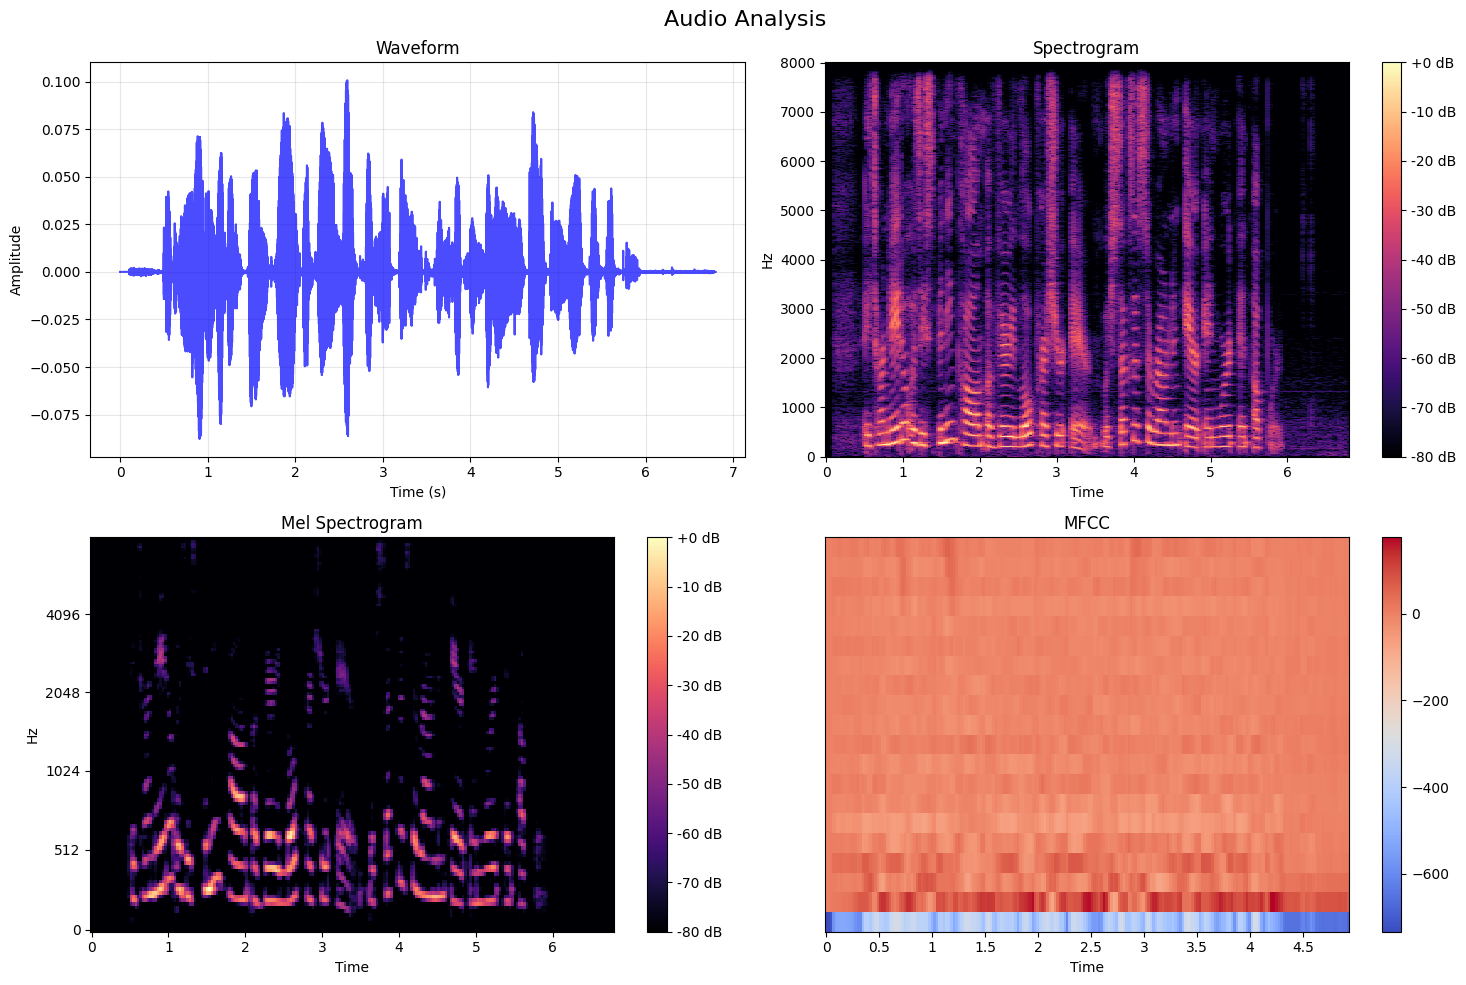

   Audio Statistics:
   Duration: 6.80 seconds
   Sample Rate: 16000 Hz
   Samples: 108,800
   Max Amplitude: 0.1008
   RMS Energy: 0.0138


In [20]:
idx = 0    # choose any random index
sample = paired_data[idx]

# Eng sample eda
print(f"English Transcript: {sample['en_text']}\n")
comprehensive_audio_analysis(sample["en_speech"]["array"], sample["en_speech"]["sampling_rate"], title="Audio Analysis")

Hindi Transcript: बवंडर बहुत कम दबाव वाली हवा का एक घुमता हुवा स्तंभ होता है, जो आसपास की हवा को अंदर और ऊपर की तरफ खींचता है।



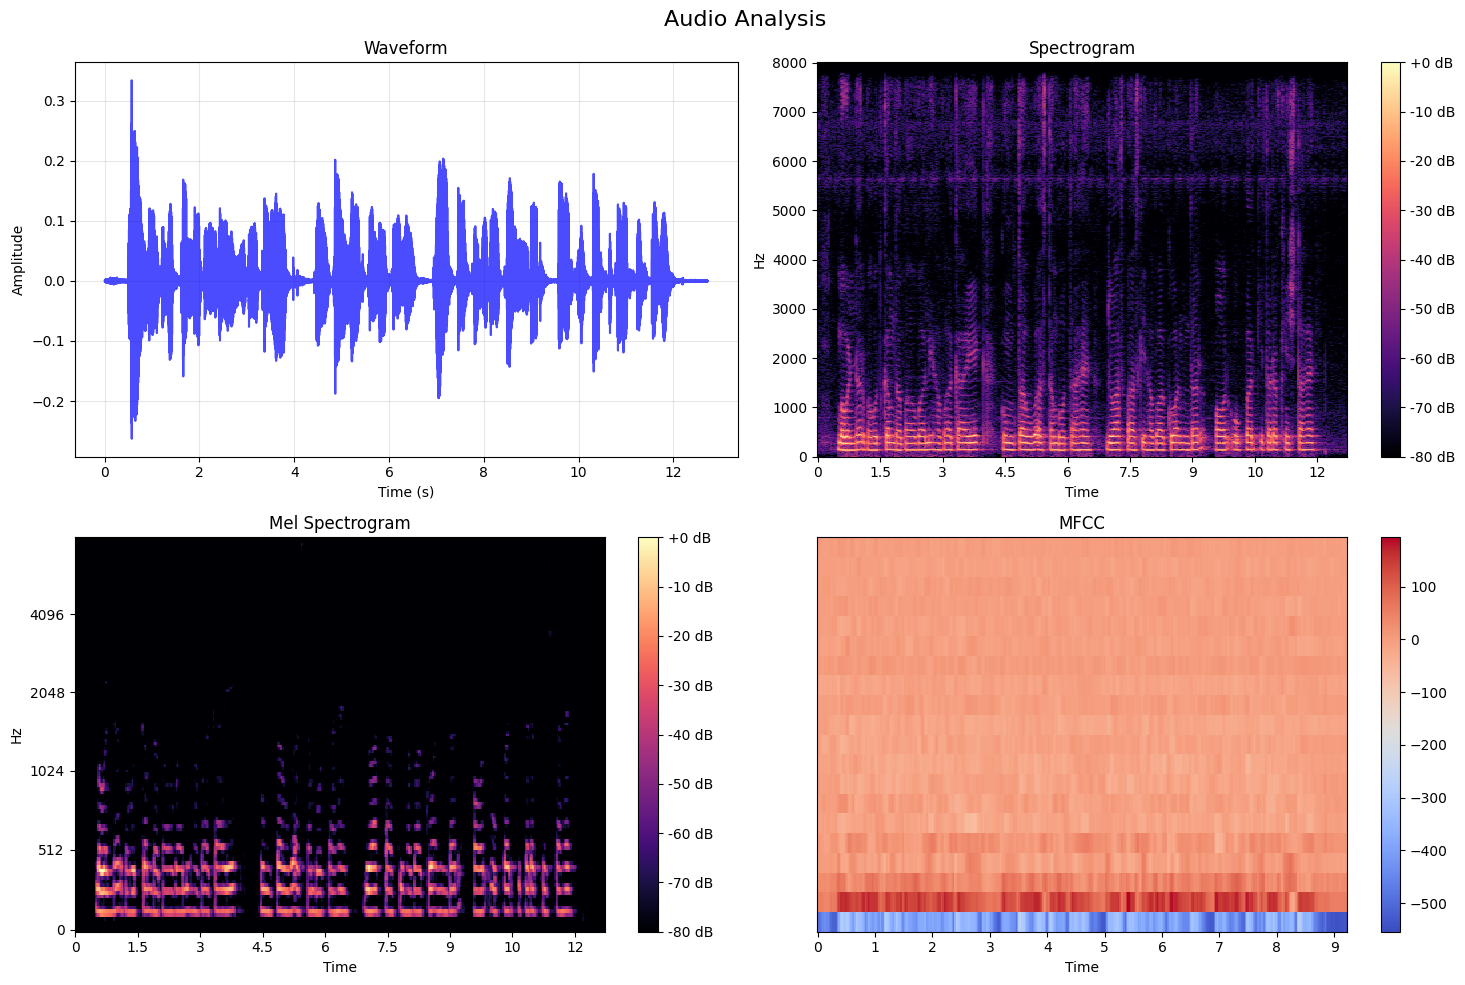

   Audio Statistics:
   Duration: 12.72 seconds
   Sample Rate: 16000 Hz
   Samples: 203,520
   Max Amplitude: 0.3344
   RMS Energy: 0.0342


In [21]:
# Corresponding Hindi sample eda
print(f"Hindi Transcript: {sample['hi_text']}\n")
comprehensive_audio_analysis(sample["hi_speech"]["array"], sample["hi_speech"]["sampling_rate"], title="Audio Analysis")